In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
from itertools import permutations
from sklearn.linear_model import LogisticRegression
from helper import *
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pickle

In [56]:
with open('tuned_models/best_models_gb.pkl', 'rb') as f:
    best_models_gb = pickle.load(f)
    
with open('tuned_models/best_models_lr.pkl', 'rb') as f:
    best_models_lr = pickle.load(f)
    
with open('tuned_models/best_models_rf.pkl', 'rb') as f:
    best_models_rf = pickle.load(f)

In [57]:
with open('useful_courses.pkl', 'rb') as f:
    eng_filtered_exams = pickle.load(f)

## Gradient Boosting

In [58]:
# score = []
in_sample_diff = []
out_sample_diff = []
relative_out_sample_diff = [] # difference divided by test size
rnd_in_sample_diff = []
rnd_out_sample_diff = []
for course in eng_filtered_exams:
    course_df = feature_engineer(course)
    x_train, y_train, x_test, y_test = make_semester_specific_train_test(course_df, target_sem = "sp23",
                                                                         past_sems = ["fa22", "sp22"])
    model = best_models_gb[course]
    model.fit(x_train, y_train)
#     score.append(model.score(x_test, y_test))
#     print('In-sample prediction:')
#     print('Expected number of people that will drop: ', np.sum(model.predict_proba(x_train)[:,1]))
#     print('Actual number of student dropped: ', np.sum(y_train) )
    in_sample_diff.append(np.sum(model.predict_proba(x_train)[:,1]) - np.sum(y_train))
    # Expected number of people that will drop
#     print('Out-of-sample prediction:')
#     print('Expected number of people that will drop: ', np.sum(model.predict_proba(x_test)[:,1]))
#     print('Actual number of student dropped: ', np.sum(y_test))
    out_sample_diff.append(np.sum(model.predict_proba(x_test)[:,1]) - np.sum(y_test))
    relative_out_sample_diff.append((np.sum(model.predict_proba(x_test)[:,1]) - np.sum(y_test)) / len(y_test))
    X = np.concatenate((x_train, x_test))
    y = np.concatenate((y_train, y_test))
#     print(y)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
#     x_train, y_train, x_test, y_test = make_random_train_test(course_df, train_ratio = 0.7, random_state = 2)
    model = best_models_gb[course]
    model.fit(x_train, y_train)
    rnd_in_sample_diff.append(np.sum(model.predict_proba(x_train)[:,1]) - np.sum(y_train))
    rnd_out_sample_diff.append(np.sum(model.predict_proba(x_test)[:,1]) - np.sum(y_test))

11 students pre-enrolled in AEP-4400
0 data point is nan during processing
Sanity check passed
2 students dropped
1 students dropped in the train data
20 students pre-enrolled in AEP-5400
1 data point is nan during processing
Sanity check passed
2 students dropped
1 students dropped in the train data
71 students pre-enrolled in BEE-5330
1 data point is nan during processing
Sanity check passed
8 students dropped
1 students dropped in the train data
139 students pre-enrolled in BME-2110
0 data point is nan during processing
Sanity check passed
4 students dropped
1 students dropped in the train data
104 students pre-enrolled in BME-3020
0 data point is nan during processing
Sanity check passed
3 students dropped
2 students dropped in the train data
13 students pre-enrolled in BME-3410
0 data point is nan during processing
Sanity check passed
2 students dropped
1 students dropped in the train data
112 students pre-enrolled in CEE-3610
0 data point is nan during processing
Sanity check pas

94 students pre-enrolled in MAE-4510
0 data point is nan during processing
Sanity check passed
12 students dropped
1 students dropped in the train data
24 students pre-enrolled in MAE-4610
1 data point is nan during processing
Sanity check passed
3 students dropped
1 students dropped in the train data
95 students pre-enrolled in MAE-4860
0 data point is nan during processing
Sanity check passed
15 students dropped
4 students dropped in the train data
159 students pre-enrolled in MAE-5010
6 data point is nan during processing
Sanity check passed
13 students dropped
3 students dropped in the train data
19 students pre-enrolled in MAE-5230
1 data point is nan during processing
Sanity check passed
4 students dropped
1 students dropped in the train data
418 students pre-enrolled in MATH-1106
0 data point is nan during processing
Sanity check passed
27 students dropped
2 students dropped in the train data
1203 students pre-enrolled in MATH-1110
4 data point is nan during processing
Sanity ch

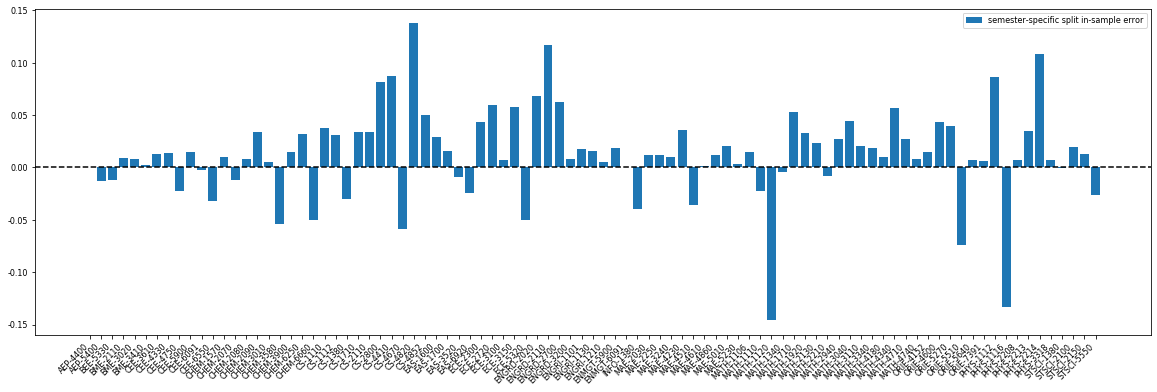

In [59]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))


plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(in_sample_diff),
        align = 'center', label = 'semester-specific split in-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend();

In [60]:
out_sample_diff = np.array(out_sample_diff)
print(f'{sum(out_sample_diff > 0)} courses predict more drops')
print(f'On average, the model predicts {out_sample_diff[out_sample_diff >0].mean()} more drops')
print(f'{sum(out_sample_diff < 0)} courses predict fewer drops')
print(f'On average, the model predicts {-1 * out_sample_diff[out_sample_diff <0].mean()} fewer drops')
print(f'In median, the model predicts {-1 * np.median(out_sample_diff[out_sample_diff <0])} fewer drops')
print(f'Semester-specific Prediction Mean Squared Error (MSE) is {np.mean(out_sample_diff**2)}')

4 courses predict more drops
On average, the model predicts 1.0647534262655212 more drops
87 courses predict fewer drops
On average, the model predicts 16.29405799542007 fewer drops
In median, the model predicts 8.341155320269309 fewer drops
Semester-specific Prediction Mean Squared Error (MSE) is 556.3178458726751


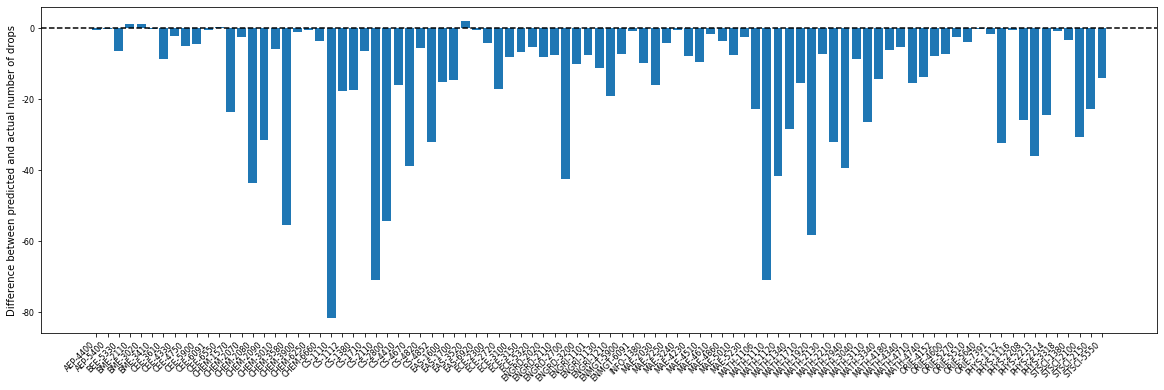

In [61]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))


plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(out_sample_diff),
        align = 'center', label = 'semester-specific split out-of-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
# plt.legend();
plt.ylabel('Difference between predicted and actual number of drops', fontsize = 10);
plt.savefig('figures/gb-semester.png', bbox_inches='tight', dpi=100)

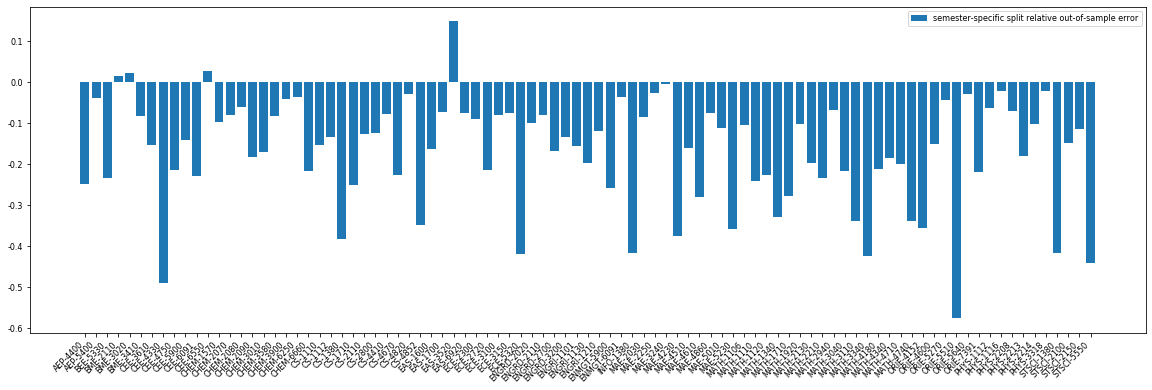

In [62]:
# plt.axhline(y=0, color='black', linestyle='--')
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))
plt.bar(eng_filtered_exams, np.array(relative_out_sample_diff),
        align = 'center', label = 'semester-specific split relative out-of-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend();

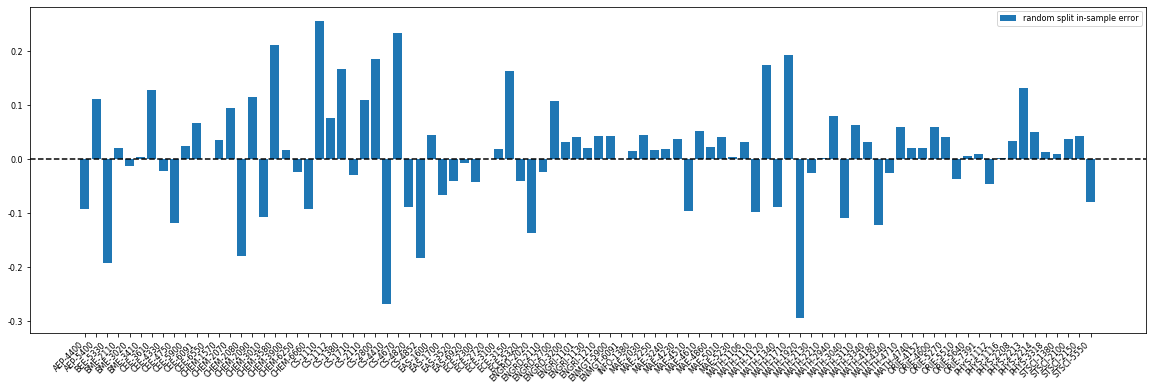

In [63]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))


plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(rnd_in_sample_diff),
        align = 'center', label = 'random split in-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend();

In [64]:
rnd_out_sample_diff = np.array(rnd_out_sample_diff)
print(f'Random Split Prediction Mean Squared Error (MSE) is {np.mean(rnd_out_sample_diff**2)}')

Random Split Prediction Mean Squared Error (MSE) is 0.3374145650349635


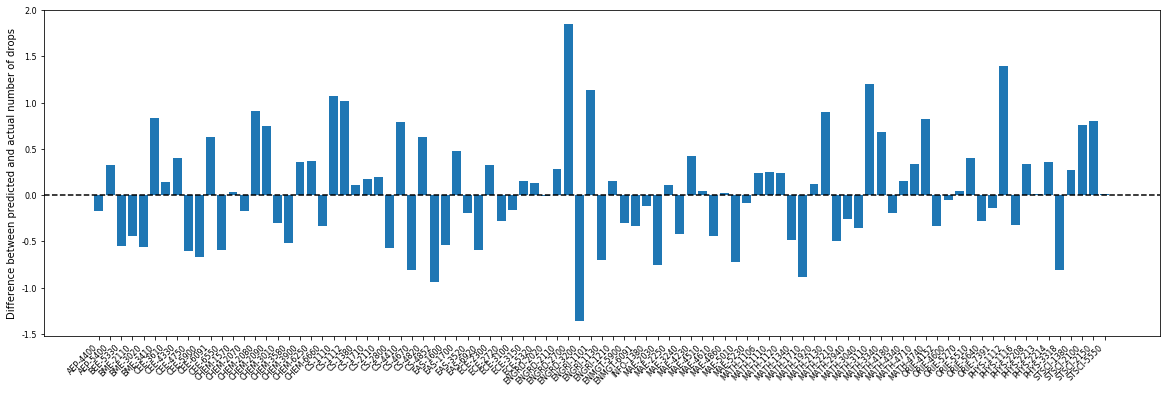

In [65]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))


plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(rnd_out_sample_diff),
        align = 'center', label = 'random split out-of-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
# plt.legend();
plt.ylabel('Difference between predicted and actual number of drops', fontsize = 10);
plt.savefig('figures/gb-random.png', bbox_inches='tight', dpi=100)

## Random Forest

In [66]:
# score = []
in_sample_diff = []
out_sample_diff = []
relative_out_sample_diff = [] # difference divided by test size
rnd_in_sample_diff = []
rnd_out_sample_diff = []
for course in eng_filtered_exams:
    course_df = feature_engineer(course)
    x_train, y_train, x_test, y_test = make_semester_specific_train_test(course_df, target_sem = "sp23",
                                                                         past_sems = ["fa22", "sp22"])
    model = best_models_rf[course]
    model.fit(x_train, y_train)
#     score.append(model.score(x_test, y_test))
#     print('In-sample prediction:')
#     print('Expected number of people that will drop: ', np.sum(model.predict_proba(x_train)[:,1]))
#     print('Actual number of student dropped: ', np.sum(y_train) )
    in_sample_diff.append(np.sum(model.predict_proba(x_train)[:,1]) - np.sum(y_train))
    # Expected number of people that will drop
#     print('Out-of-sample prediction:')
#     print('Expected number of people that will drop: ', np.sum(model.predict_proba(x_test)[:,1]))
#     print('Actual number of student dropped: ', np.sum(y_test))
    out_sample_diff.append(np.sum(model.predict_proba(x_test)[:,1]) - np.sum(y_test))
    relative_out_sample_diff.append((np.sum(model.predict_proba(x_test)[:,1]) - np.sum(y_test)) / len(y_test))
    X = np.concatenate((x_train, x_test))
    y = np.concatenate((y_train, y_test))
#     print(y)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
#     x_train, y_train, x_test, y_test = make_random_train_test(course_df, train_ratio = 0.7, random_state = 2)
    model = best_models_rf[course]
    model.fit(x_train, y_train)
    rnd_in_sample_diff.append(np.sum(model.predict_proba(x_train)[:,1]) - np.sum(y_train))
    rnd_out_sample_diff.append(np.sum(model.predict_proba(x_test)[:,1]) - np.sum(y_test))

11 students pre-enrolled in AEP-4400
0 data point is nan during processing
Sanity check passed
2 students dropped
1 students dropped in the train data
20 students pre-enrolled in AEP-5400
1 data point is nan during processing
Sanity check passed
2 students dropped
1 students dropped in the train data
71 students pre-enrolled in BEE-5330
1 data point is nan during processing
Sanity check passed
8 students dropped
1 students dropped in the train data
139 students pre-enrolled in BME-2110
0 data point is nan during processing
Sanity check passed
4 students dropped
1 students dropped in the train data
104 students pre-enrolled in BME-3020
0 data point is nan during processing
Sanity check passed
3 students dropped
2 students dropped in the train data
13 students pre-enrolled in BME-3410
0 data point is nan during processing
Sanity check passed
2 students dropped
1 students dropped in the train data
112 students pre-enrolled in CEE-3610
0 data point is nan during processing
Sanity check pas

94 students pre-enrolled in MAE-4510
0 data point is nan during processing
Sanity check passed
12 students dropped
1 students dropped in the train data
24 students pre-enrolled in MAE-4610
1 data point is nan during processing
Sanity check passed
3 students dropped
1 students dropped in the train data
95 students pre-enrolled in MAE-4860
0 data point is nan during processing
Sanity check passed
15 students dropped
4 students dropped in the train data
159 students pre-enrolled in MAE-5010
6 data point is nan during processing
Sanity check passed
13 students dropped
3 students dropped in the train data
19 students pre-enrolled in MAE-5230
1 data point is nan during processing
Sanity check passed
4 students dropped
1 students dropped in the train data
418 students pre-enrolled in MATH-1106
0 data point is nan during processing
Sanity check passed
27 students dropped
2 students dropped in the train data
1203 students pre-enrolled in MATH-1110
4 data point is nan during processing
Sanity ch

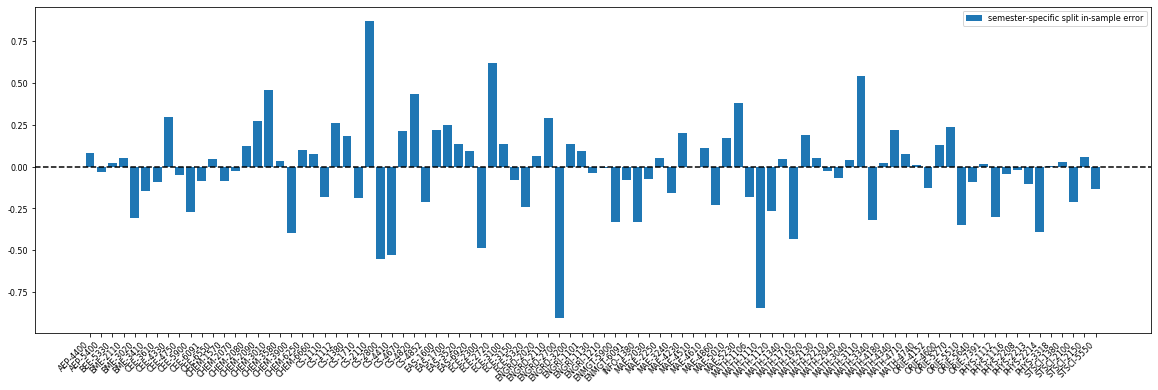

In [67]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))


plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(in_sample_diff),
        align = 'center', label = 'semester-specific split in-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend();

In [68]:
out_sample_diff = np.array(out_sample_diff)
print(f'{sum(out_sample_diff > 0)} courses predict more drops')
print(f'On average, the model predicts {out_sample_diff[out_sample_diff >0].mean()} more drops')
print(f'{sum(out_sample_diff < 0)} courses predict fewer drops')
print(f'On average, the model predicts {-1 * out_sample_diff[out_sample_diff <0].mean()} fewer drops')
print(f'In median, the model predicts {-1 * np.median(out_sample_diff[out_sample_diff <0])} fewer drops')
print(f'Semester-specific Prediction Mean Squared Error (MSE) is {np.mean(out_sample_diff**2)}')

4 courses predict more drops
On average, the model predicts 1.724541215728716 more drops
87 courses predict fewer drops
On average, the model predicts 16.317187760322355 fewer drops
In median, the model predicts 8.34 fewer drops
Semester-specific Prediction Mean Squared Error (MSE) is 551.531737242264


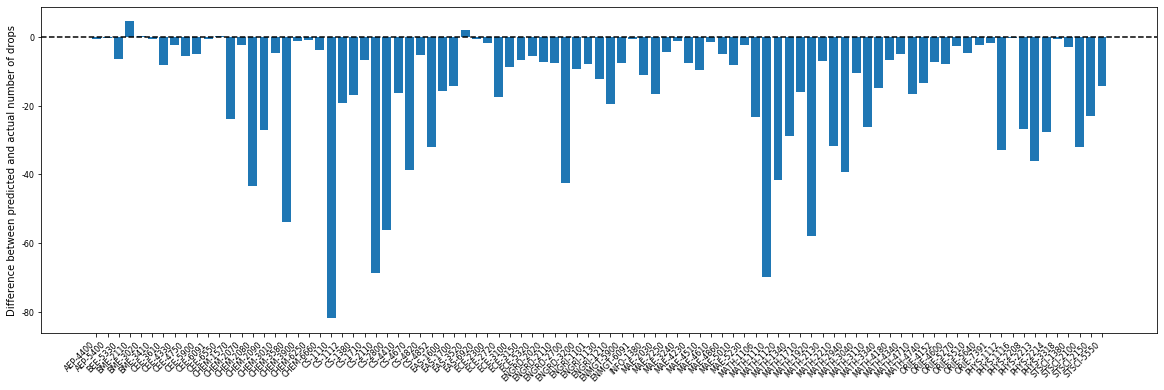

In [69]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))


plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(out_sample_diff),
        align = 'center', label = 'semester-specific split out-of-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
# plt.legend();
plt.ylabel('Difference between predicted and actual number of drops', fontsize = 10);
plt.savefig('figures/rf-semester.png', bbox_inches='tight', dpi=100)

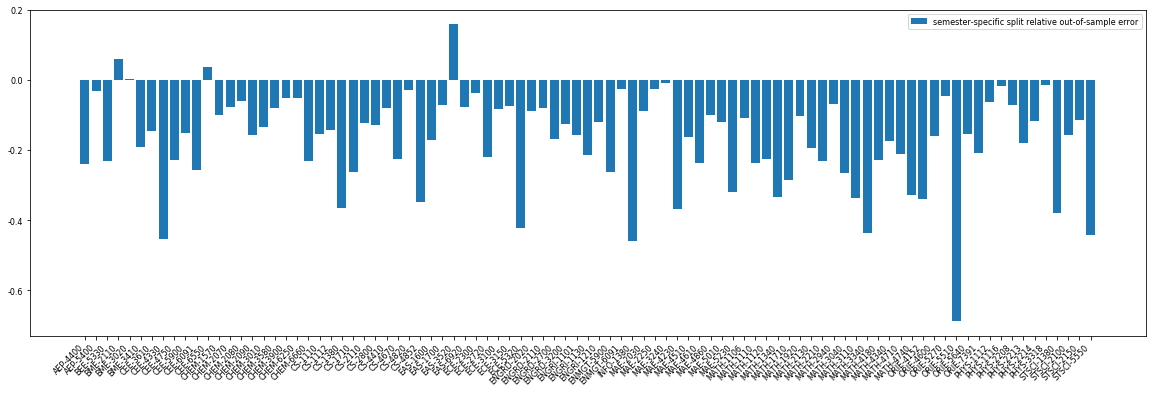

In [70]:
# plt.axhline(y=0, color='black', linestyle='--')
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))
plt.bar(eng_filtered_exams, np.array(relative_out_sample_diff),
        align = 'center', label = 'semester-specific split relative out-of-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend();

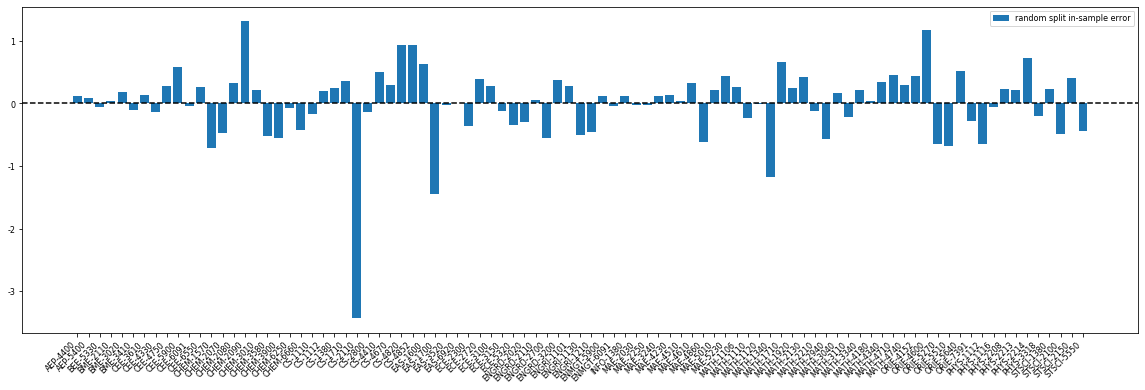

In [71]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))


plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(rnd_in_sample_diff),
        align = 'center', label = 'random split in-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend();

In [72]:
rnd_out_sample_diff = np.array(rnd_out_sample_diff)
print(f'Random Split Prediction Mean Squared Error (MSE) is {np.mean(rnd_out_sample_diff**2)}')

Random Split Prediction Mean Squared Error (MSE) is 0.6638204600816792


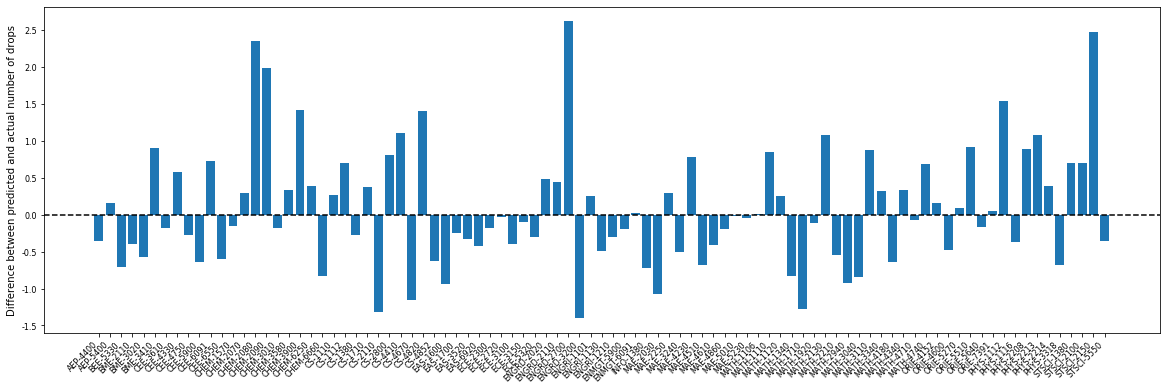

In [73]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))


plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(rnd_out_sample_diff),
        align = 'center', label = 'random split out-of-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
# plt.legend();
plt.ylabel('Difference between predicted and actual number of drops', fontsize = 10);
plt.savefig('figures/rf-random.png', bbox_inches='tight', dpi=100)

## Logistic Regression

In [74]:
# score = []
in_sample_diff = []
out_sample_diff = []
relative_out_sample_diff = [] # difference divided by test size
rnd_in_sample_diff = []
rnd_out_sample_diff = []
for course in eng_filtered_exams:
    course_df = feature_engineer(course)
    x_train, y_train, x_test, y_test = make_semester_specific_train_test(course_df, target_sem = "sp23",
                                                                         past_sems = ["fa22", "sp22"])
    model = best_models_lr[course]
    model.fit(x_train, y_train)
#     score.append(model.score(x_test, y_test))
#     print('In-sample prediction:')
#     print('Expected number of people that will drop: ', np.sum(model.predict_proba(x_train)[:,1]))
#     print('Actual number of student dropped: ', np.sum(y_train) )
    in_sample_diff.append(np.sum(model.predict_proba(x_train)[:,1]) - np.sum(y_train))
    # Expected number of people that will drop
#     print('Out-of-sample prediction:')
#     print('Expected number of people that will drop: ', np.sum(model.predict_proba(x_test)[:,1]))
#     print('Actual number of student dropped: ', np.sum(y_test))
    out_sample_diff.append(np.sum(model.predict_proba(x_test)[:,1]) - np.sum(y_test))
    relative_out_sample_diff.append((np.sum(model.predict_proba(x_test)[:,1]) - np.sum(y_test)) / len(y_test))
    X = np.concatenate((x_train, x_test))
    y = np.concatenate((y_train, y_test))
#     print(y)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
#     x_train, y_train, x_test, y_test = make_random_train_test(course_df, train_ratio = 0.7, random_state = 2)
    model = best_models_lr[course]
    model.fit(x_train, y_train)
    rnd_in_sample_diff.append(np.sum(model.predict_proba(x_train)[:,1]) - np.sum(y_train))
    rnd_out_sample_diff.append(np.sum(model.predict_proba(x_test)[:,1]) - np.sum(y_test))

11 students pre-enrolled in AEP-4400
0 data point is nan during processing
Sanity check passed
2 students dropped
1 students dropped in the train data
20 students pre-enrolled in AEP-5400
1 data point is nan during processing
Sanity check passed
2 students dropped
1 students dropped in the train data


/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


71 students pre-enrolled in BEE-5330
1 data point is nan during processing
Sanity check passed
8 students dropped
1 students dropped in the train data
139 students pre-enrolled in BME-2110
0 data point is nan during processing
Sanity check passed
4 students dropped
1 students dropped in the train data
104 students pre-enrolled in BME-3020
0 data point is nan during processing
Sanity check passed
3 students dropped
2 students dropped in the train data
13 students pre-enrolled in BME-3410
0 data point is nan during processing
Sanity check passed
2 students dropped
1 students dropped in the train data
112 students pre-enrolled in CEE-3610
0 data point is nan during processing
Sanity check passed
11 students dropped
1 students dropped in the train data
18 students pre-enrolled in CEE-4330
0 data point is nan during processing
Sanity check passed
5 students dropped
2 students dropped in the train data
46 students pre-enrolled in CEE-4750
0 data point is nan during processing
Sanity check pa

/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


186 students pre-enrolled in CEE-5900
2 data point is nan during processing
Sanity check passed
13 students dropped
7 students dropped in the train data
19 students pre-enrolled in CEE-6091
0 data point is nan during processing
Sanity check passed
2 students dropped
1 students dropped in the train data
25 students pre-enrolled in CEE-6550
1 data point is nan during processing
Sanity check passed
3 students dropped
2 students dropped in the train data


/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


465 students pre-enrolled in CHEM-1570
2 data point is nan during processing
Sanity check passed
26 students dropped
1 students dropped in the train data
845 students pre-enrolled in CHEM-2070
0 data point is nan during processing
Sanity check passed
14 students dropped
11 students dropped in the train data
1482 students pre-enrolled in CHEM-2080
4 data point is nan during processing
Sanity check passed
52 students dropped
4 students dropped in the train data
801 students pre-enrolled in CHEM-2090
1 data point is nan during processing
Sanity check passed
39 students dropped
4 students dropped in the train data
64 students pre-enrolled in CHEM-3010
0 data point is nan during processing
Sanity check passed
8 students dropped
1 students dropped in the train data


/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


1221 students pre-enrolled in CHEM-3580
6 data point is nan during processing
Sanity check passed
59 students dropped
2 students dropped in the train data
95 students pre-enrolled in CHEM-3900
0 data point is nan during processing
Sanity check passed
5 students dropped
2 students dropped in the train data
55 students pre-enrolled in CHEM-6250
1 data point is nan during processing
Sanity check passed
2 students dropped
1 students dropped in the train data
52 students pre-enrolled in CHEM-6660
1 data point is nan during processing
Sanity check passed
5 students dropped
1 students dropped in the train data
1889 students pre-enrolled in CS-1110
15 data point is nan during processing
Sanity check passed
92 students dropped
8 students dropped in the train data
432 students pre-enrolled in CS-1112
4 data point is nan during processing
Sanity check passed
27 students dropped
7 students dropped in the train data


/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


101 students pre-enrolled in CS-1380
4 data point is nan during processing
Sanity check passed
22 students dropped
2 students dropped in the train data
69 students pre-enrolled in CS-1710
1 data point is nan during processing
Sanity check passed
11 students dropped
3 students dropped in the train data
1669 students pre-enrolled in CS-2110
20 data point is nan during processing
Sanity check passed
116 students dropped
30 students dropped in the train data
1369 students pre-enrolled in CS-2800
9 data point is nan during processing
Sanity check passed
73 students dropped
13 students dropped in the train data
790 students pre-enrolled in CS-4410
4 data point is nan during processing
Sanity check passed
22 students dropped
4 students dropped in the train data
436 students pre-enrolled in CS-4670
4 data point is nan during processing
Sanity check passed
44 students dropped
3 students dropped in the train data
776 students pre-enrolled in CS-4820
3 data point is nan during processing
Sanity c

/Users/joeye/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


44 students pre-enrolled in EAS-6920
0 data point is nan during processing
Sanity check passed
3 students dropped
2 students dropped in the train data
154 students pre-enrolled in ECE-2300
0 data point is nan during processing
Sanity check passed
11 students dropped
4 students dropped in the train data
190 students pre-enrolled in ECE-2720
1 data point is nan during processing
Sanity check passed
24 students dropped
4 students dropped in the train data
235 students pre-enrolled in ECE-3100
0 data point is nan during processing
Sanity check passed
10 students dropped
1 students dropped in the train data


/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


196 students pre-enrolled in ECE-3150
0 data point is nan during processing
Sanity check passed
11 students dropped
2 students dropped in the train data
33 students pre-enrolled in ECE-5320
3 data point is nan during processing
Sanity check passed
7 students dropped
1 students dropped in the train data
457 students pre-enrolled in ENGRD-2020
0 data point is nan during processing
Sanity check passed
16 students dropped
6 students dropped in the train data


/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


383 students pre-enrolled in ENGRD-2110
1 data point is nan during processing
Sanity check passed
12 students dropped
3 students dropped in the train data
713 students pre-enrolled in ENGRD-2700
6 data point is nan during processing
Sanity check passed
62 students dropped
12 students dropped in the train data
140 students pre-enrolled in ENGRD-3200
1 data point is nan during processing
Sanity check passed
13 students dropped
1 students dropped in the train data
189 students pre-enrolled in ENGRI-1101
0 data point is nan during processing
Sanity check passed
11 students dropped
2 students dropped in the train data
121 students pre-enrolled in ENGRI-1130
1 data point is nan during processing
Sanity check passed
19 students dropped
4 students dropped in the train data
322 students pre-enrolled in ENGRI-1210
2 data point is nan during processing
Sanity check passed
21 students dropped
1 students dropped in the train data
225 students pre-enrolled in ENMGT-5900
6 data point is nan during pr

/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


36 students pre-enrolled in MAE-4230
0 data point is nan during processing
Sanity check passed
10 students dropped
1 students dropped in the train data
94 students pre-enrolled in MAE-4510
0 data point is nan during processing
Sanity check passed
12 students dropped
1 students dropped in the train data
24 students pre-enrolled in MAE-4610
1 data point is nan during processing
Sanity check passed
3 students dropped
1 students dropped in the train data
95 students pre-enrolled in MAE-4860
0 data point is nan during processing
Sanity check passed
15 students dropped
4 students dropped in the train data
159 students pre-enrolled in MAE-5010
6 data point is nan during processing
Sanity check passed
13 students dropped
3 students dropped in the train data
19 students pre-enrolled in MAE-5230
1 data point is nan during processing
Sanity check passed
4 students dropped
1 students dropped in the train data


/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


418 students pre-enrolled in MATH-1106
0 data point is nan during processing
Sanity check passed
27 students dropped
2 students dropped in the train data
1203 students pre-enrolled in MATH-1110
4 data point is nan during processing
Sanity check passed
110 students dropped
29 students dropped in the train data


/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


550 students pre-enrolled in MATH-1120
6 data point is nan during processing
Sanity check passed
62 students dropped
14 students dropped in the train data
177 students pre-enrolled in MATH-1340
3 data point is nan during processing
Sanity check passed
30 students dropped
1 students dropped in the train data
178 students pre-enrolled in MATH-1710
3 data point is nan during processing
Sanity check passed
29 students dropped
9 students dropped in the train data
1745 students pre-enrolled in MATH-1920
7 data point is nan during processing
Sanity check passed
66 students dropped
5 students dropped in the train data
63 students pre-enrolled in MATH-2130
0 data point is nan during processing
Sanity check passed
12 students dropped
2 students dropped in the train data
481 students pre-enrolled in MATH-2210
6 data point is nan during processing
Sanity check passed
44 students dropped
8 students dropped in the train data
1622 students pre-enrolled in MATH-2940
4 data point is nan during processi

/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


230 students pre-enrolled in MATH-4710
1 data point is nan during processing
Sanity check passed
21 students dropped
4 students dropped in the train data


/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


83 students pre-enrolled in MATH-4740
3 data point is nan during processing
Sanity check passed
16 students dropped
1 students dropped in the train data
61 students pre-enrolled in ORIE-4152
0 data point is nan during processing
Sanity check passed
12 students dropped
3 students dropped in the train data
111 students pre-enrolled in ORIE-4600
2 data point is nan during processing
Sanity check passed
16 students dropped
5 students dropped in the train data
173 students pre-enrolled in ORIE-5270
4 data point is nan during processing
Sanity check passed
7 students dropped
3 students dropped in the train data
19 students pre-enrolled in ORIE-5510
2 data point is nan during processing
Sanity check passed
7 students dropped
2 students dropped in the train data
46 students pre-enrolled in ORIE-5640
0 data point is nan during processing
Sanity check passed
9 students dropped
6 students dropped in the train data
28 students pre-enrolled in ORIE-7391
0 data point is nan during processing
Sanity 

/Users/joeye/.local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


602 students pre-enrolled in STSCI-2150
3 data point is nan during processing
Sanity check passed
30 students dropped
5 students dropped in the train data
80 students pre-enrolled in STSCI-5550
6 data point is nan during processing
Sanity check passed
16 students dropped
1 students dropped in the train data


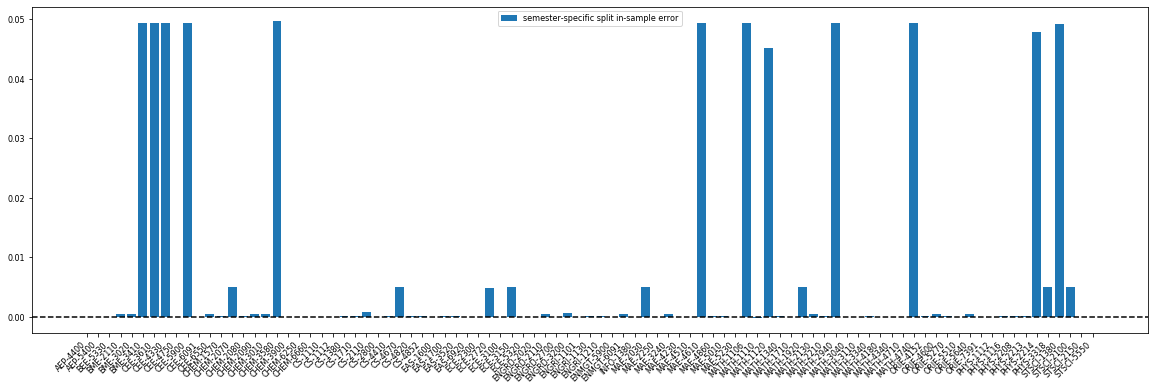

In [75]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))


plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(in_sample_diff),
        align = 'center', label = 'semester-specific split in-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend();

In [76]:
out_sample_diff = np.array(out_sample_diff)
print(f'{sum(out_sample_diff > 0)} courses predict more drops')
print(f'On average, the model predicts {out_sample_diff[out_sample_diff >0].mean()} more drops')
print(f'{sum(out_sample_diff < 0)} courses predict fewer drops')
print(f'On average, the model predicts {-1 * out_sample_diff[out_sample_diff <0].mean()} fewer drops')
print(f'In median, the model predicts {-1 * np.median(out_sample_diff[out_sample_diff <0])} fewer drops')
print(f'Semester-specific Prediction Mean Squared Error (MSE) is {np.mean(out_sample_diff**2)}')

5 courses predict more drops
On average, the model predicts 1.1724243277659394 more drops
86 courses predict fewer drops
On average, the model predicts 16.49452284091246 fewer drops
In median, the model predicts 8.792702202364449 fewer drops
Semester-specific Prediction Mean Squared Error (MSE) is 554.6892647796076


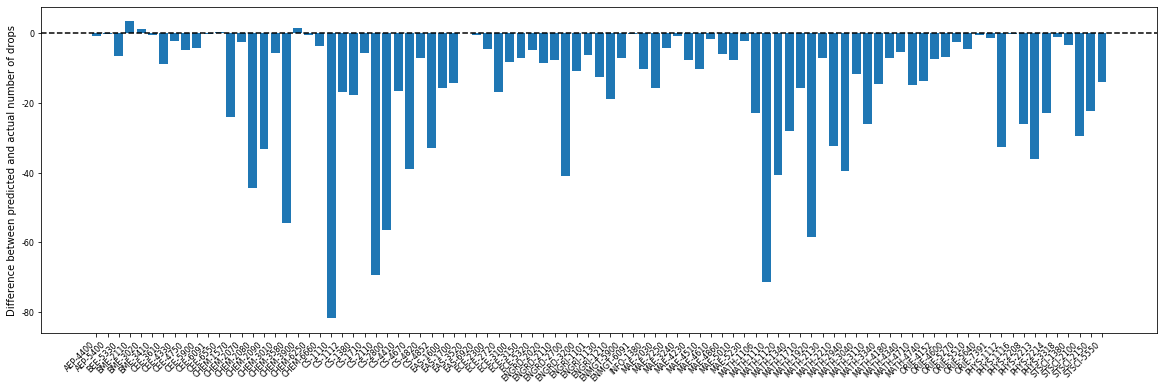

In [77]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))


plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(out_sample_diff),
        align = 'center', label = 'semester-specific split out-of-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
# plt.legend();
plt.ylabel('Difference between predicted and actual number of drops', fontsize = 10);
plt.savefig('figures/lr-semester.png', bbox_inches='tight', dpi = 100)

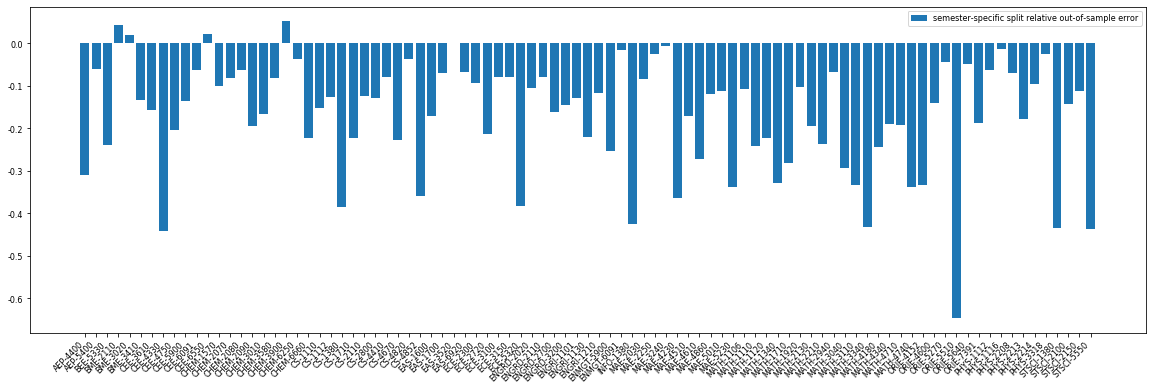

In [78]:
# plt.axhline(y=0, color='black', linestyle='--')
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))
plt.bar(eng_filtered_exams, np.array(relative_out_sample_diff),
        align = 'center', label = 'semester-specific split relative out-of-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend();

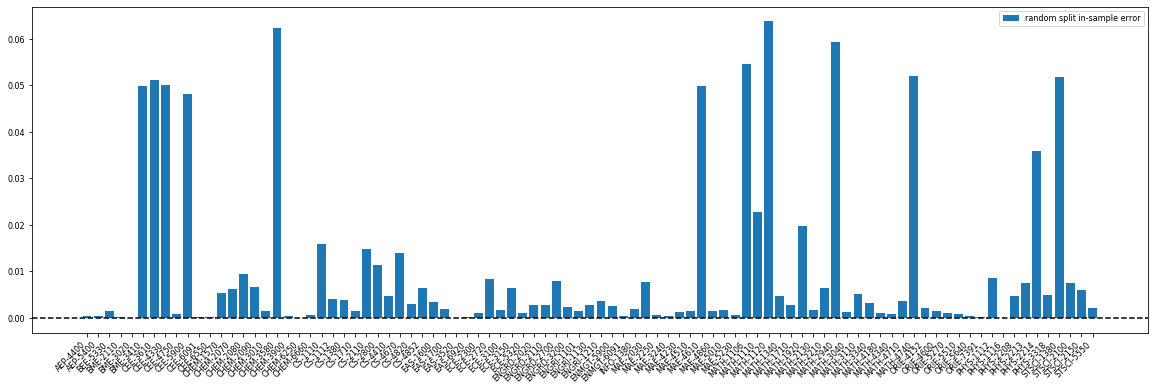

In [79]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))


plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(rnd_in_sample_diff),
        align = 'center', label = 'random split in-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend();

In [80]:
rnd_out_sample_diff = np.array(rnd_out_sample_diff)
print(f'Random Split Prediction Mean Squared Error (MSE) is {np.mean(rnd_out_sample_diff**2)}')

Random Split Prediction Mean Squared Error (MSE) is 0.3304472185860251


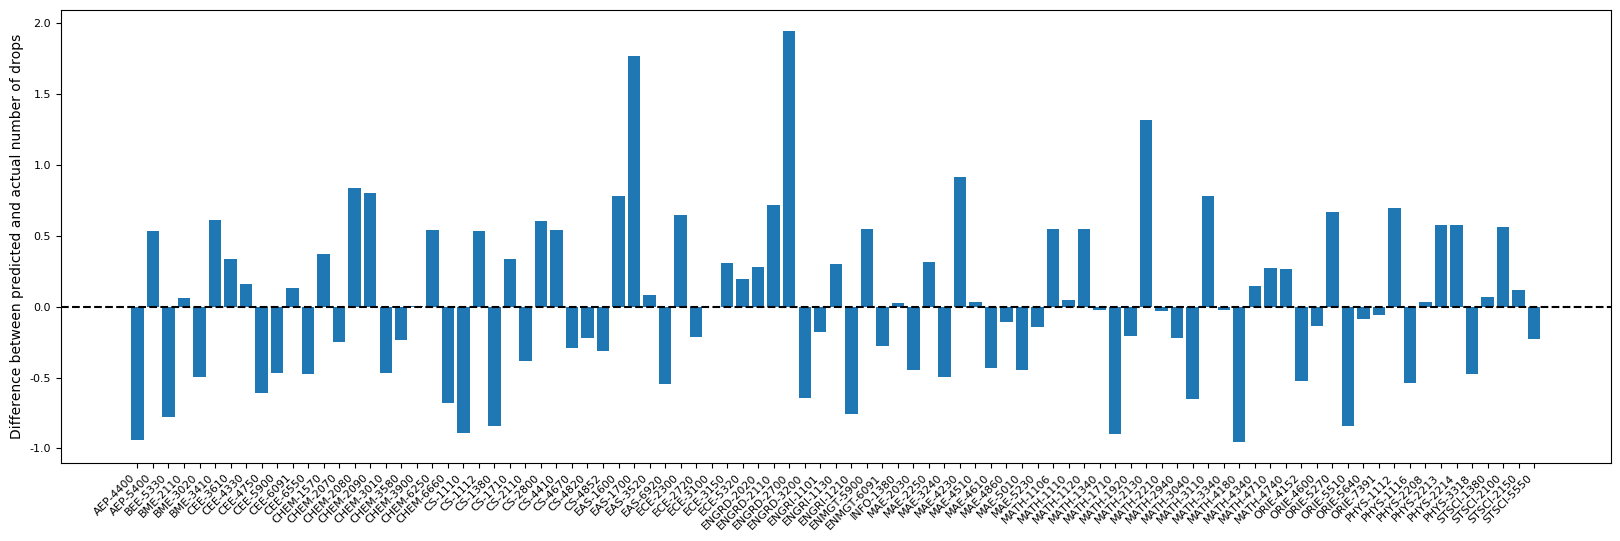

In [81]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6), dpi = 100)


plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(rnd_out_sample_diff),
        align = 'center', label = 'LR - random train/test split out-of-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
# plt.legend(fontsize = 15);
plt.ylabel('Difference between predicted and actual number of drops', fontsize = 10);
plt.savefig('figures/lr-random.png', bbox_inches='tight')